In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel("/content/homeprices_uni.xlsx")

In [4]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


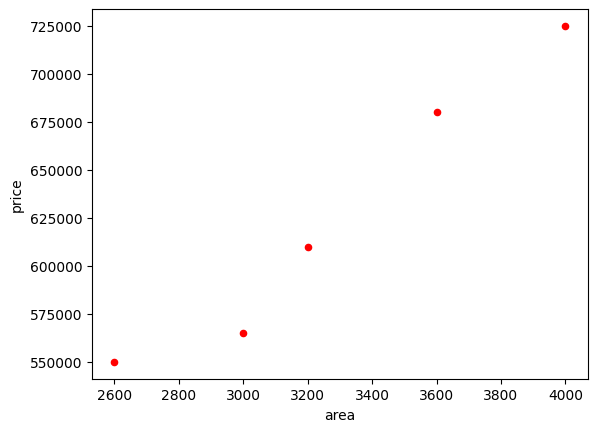

In [15]:
df.plot.scatter('area', 'price', color='red')
plt.show()

In [16]:
X_train = df.drop('price', axis=1)
y_train = df.drop('area', axis=1)

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)

In [18]:
from sklearn.metrics import mean_squared_error

def gradient_descent(X, y, theta, lr=0.01, steps=100):
    N = len(y)
    cost_history = np.zeros(steps)
    theta_history = np.zeros((steps, 2))
    for i in range(steps):
        prediction = np.dot(X, theta)
        theta = theta - (1 / N) * lr * (X.T.dot((prediction - y)))
        theta_history[i, :] = theta.T
        cost_history[i] = mean_squared_error(prediction, y)

    return theta, cost_history, theta_history

In [19]:
lr = 0.1
it = 50
theta = np.random.randn(2, 1)

X_b = np.c_[
    X_train_scaled,
    np.ones((len(X_train_scaled), 1))
]

_, cost, theta = gradient_descent(X_b, y_train_scaled, theta, lr, it)

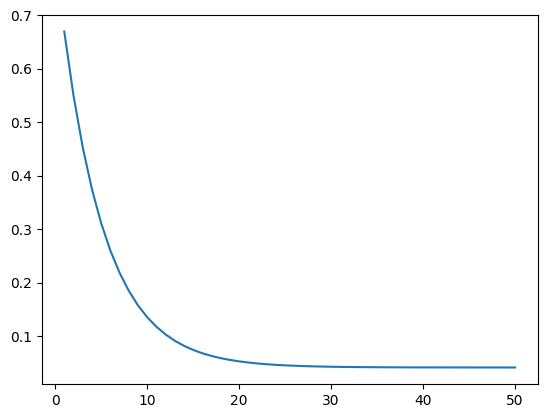

In [20]:
sns.lineplot(x=range(1, 51), y=cost)
plt.show()

In [21]:
np.array([1,2])

array([1, 2])

In [22]:
theta_df = pd.DataFrame(theta)

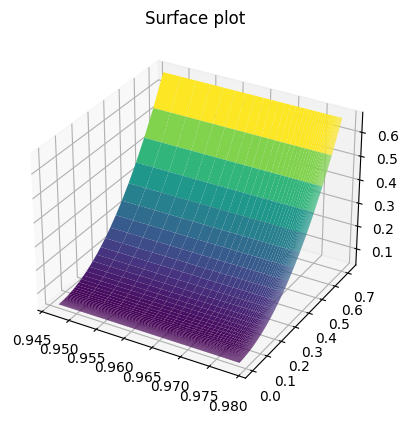

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(theta_df[0], theta_df.drop(0, axis=1), np.array(cost).reshape(-1, 1), cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

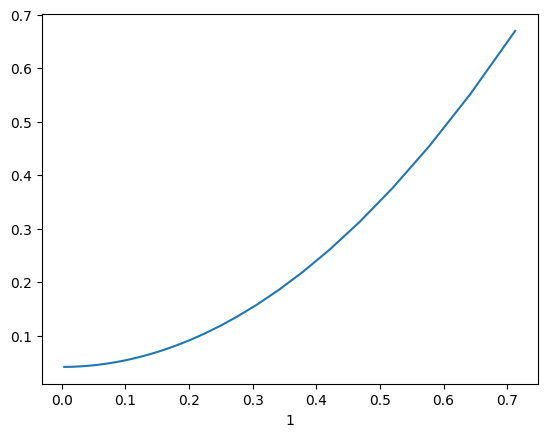

In [24]:
sns.lineplot(x=theta_df[1], y=cost)
plt.show()

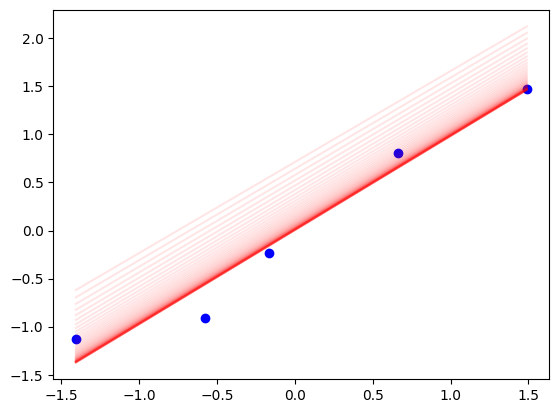

In [25]:
plt.scatter(X_train_scaled, y_train_scaled, color='blue')
for t in theta:
    plt.plot(
        X_train_scaled,
        t[0] * X_train_scaled + t[1],
        color='red',
        alpha=0.1
    )
plt.show()